# **Axion Ray**

Task 2                                                             
Data Analysis and Insights Generation using Python

In [18]:
import pandas as pd
import numpy as np

1. Column-Wise Analysis:

○ Perform a column-wise analysis of the provided dataset.

○ Describe each column in terms of its data type, unique values, distribution, and
overall significance for stakeholders

In [19]:
# Loading the dataset

In [20]:
df = pd.read_excel("/content/DA -Task 2..xlsx")


In [21]:
# Basic dataset info
print("Shape of dataset:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())

Shape of dataset: (100, 52)

Column Names:
 ['VIN', 'TRANSACTION_ID', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM', 'REPAIR_DATE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION', 'PLATFORM', 'BODY_STYLE', 'VPPC', 'PLANT', 'BUILD_COUNTRY', 'LAST_KNOWN_DLR_NAME', 'LAST_KNOWN_DLR_CITY', 'REPAIRING_DEALER_CODE', 'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION', 'REPAIR_DLR_POSTAL_CD', 'REPAIR_AGE', 'KM', 'COMPLAINT_CD_CSI', 'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO', 'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION', 'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE', 'TRANSACTION_CATEGORY', 'CAMPAIGN_NBR', 'REPORTING_COST', 'TOTALCOST', 'LBRCOST', 'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC', 'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_SOURCE_PLANT', 'TRANSMISSION_TRACE_NBR', 'SRC_TXN_ID', 'SRC_VER_NBR', 'TRANSACTION_CNTR', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES', 'LAST_KNOWN_DELVRY_TYPE_CD', 'NON_CAUSAL_PART_QTY', 'SALES_REGION_CODE']


In [22]:
# Column-wise analysis
analysis = []

for col in df.columns:
    analysis.append({
        "Column Name": col,
        "Data Type": df[col].dtype,
        "Unique Values": df[col].nunique(),
        "Missing Values": df[col].isna().sum(),
        "Distribution/Sample Values": df[col].dropna().unique()[:5]
    })

In [23]:
# Converting to DataFrame for better view
analysis_df = pd.DataFrame(analysis)

# Displaying result
print("\nColumn-wise Analysis:")
print(analysis_df)


Column-wise Analysis:
                      Column Name       Data Type  Unique Values  \
0                             VIN          object             98   
1                  TRANSACTION_ID           int64             32   
2             CORRECTION_VERBATIM          object             93   
3               CUSTOMER_VERBATIM          object            100   
4                     REPAIR_DATE  datetime64[ns]             29   
5                  CAUSAL_PART_NM          object             18   
6   GLOBAL_LABOR_CODE_DESCRIPTION          object              4   
7                        PLATFORM          object             11   
8                      BODY_STYLE          object              6   
9                            VPPC          object             26   
10                          PLANT          object             11   
11                  BUILD_COUNTRY          object              3   
12            LAST_KNOWN_DLR_NAME          object            100   
13            LAST_KNOWN_

**Significance**

The dataset includes identifiers for traceability, text fields describing customer issues and repairs, date fields for trend analysis, and attributes related to parts, manufacturing, vehicle configuration, and dealers. Together, these columns help stakeholders track issues, identify patterns, and support quality and operational decisions.


**VIN, TRANSACTION_ID, SRC_TXN_ID, TRACE_NBR, IDs, Counters**       

Significance:
These columns uniquely identify vehicles, service transactions, and system records. They are essential for end-to-end traceability, linking manufacturing data with service and repair outcomes.

**CUSTOMER_VERBATIM, CORRECTION_VERBATIM, LABOR_DESCRIPTIONS**


Significance:
Provide qualitative insight into customer-reported issues and repair actions, useful for understanding failure patterns

**REPAIR_DATE, BUILD_DATE, TRANSACTION_DATE, MODEL_YEAR**

Significance:
Enable time-based analysis to identify trends, seasonality, and changes in failure frequency over time.


**CAUSAL_PART_NM, PART_QTY, NON_CAUSAL_PART_QTY**

Significance:
Help identify frequently failing components and assess their impact on overall quality and reliability.

**PLANT, SOURCE_PLANT, ENGINE_SOURCE_PLANT, TRANSMISSION_PLANT, BUILD_COUNTRY**

Significance:
Support manufacturing quality analysis and help trace defects back to specific production locations.Support manufacturing quality analysis and help trace defects back to specific production locations.

**ENGINE_DESC, TRANSMISSION, BODY_STYLE, PLATFORM, LINE_SERIES**

Significance:
Enable comparison of issues across different vehicle designs, platforms, and configurations.


**DEALER_CODE, DEALER_NAME, CITY, SALES_REGION, REPAIR_REGION**

Significance:
Used to analyze dealer performance, regional service behavior, and geographic issue distribution.

**ERROR_CODES, LABOR_CODE_DESCRIPTION, MEDIA_FLAG**

Significance:
Support diagnostic analysis and identification of common failure modes.

**COUNTERS, HOURS, MILEAGE, QUANTITIES**

Significance:
Provide measurable indicators for usage, frequency, and operational impact analysis.


**SYSTEM_SOURCE, VERSION_NUMBERS, FLAGS**

Significance:
Used for internal system tracking, data lineage, and segmentation.

2. Data Cleaning:


*   Handle missing or invalid values using appropriate methods (e.g., imputation,
deletion).

*   Address inconsistencies in categorical columns (e.g., typos, inconsistent
capitalization).

*   Ensure numerical columns are in the correct format and free from outliers, where
applicable


In [24]:
#First we need to find the column type

In [25]:
categorical_cols = df.select_dtypes(include="object").columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns


In [26]:
#Now 1. Handle missing values

In [27]:
df[categorical_cols] = df[categorical_cols].fillna("Not Available")
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [33]:
# 2. Fix inconsistencies in categorical columns and ensuring the numeric consitency

In [34]:
df[categorical_cols] = df[categorical_cols].apply(
    lambda x: x.str.strip().str.lower()
)

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [35]:
#3.Removing Duplicates

In [36]:
df = df.drop_duplicates()


In [39]:
#Lets print the dataset after cleaning (I have already checked with the missing values in first question but will do)

In [38]:
print("\nAfter Cleaning:")
print("Shape of dataset:", df.shape)
print("\nMissing values after cleaning:")
print(df.isna().sum())


After Cleaning:
Shape of dataset: (100, 52)

Missing values after cleaning:
VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     0
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              0
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              0
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD              86
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       

Now teh data is standardized, duplicates were removed, missing values were handled appropriately by data type and it is ready for next steps

3. Identifying Critical Columns:
*   Select the top 5 critical columns that might be most insightful for stakeholders
according to your data understanding.
*   Provide reasoning for your selection

*   Generate visualizations (e.g., bar plots etc) using Python to represent these
insights effectively. (atleast 3)





In [43]:
# Selecting top 5 critical columns based on data understanding
# Importing the matplotlib library for visualisation

In [44]:
import matplotlib.pyplot as plt
critical_columns = [
    "PLANT",
    "CAUSAL_PART_NM",
    "PLATFORM",
    "BODY_STYLE",
    "REPAIR_DATE"
]

**Reasoning**:


These columns were selected because they provide the highest value for understanding where issues originate like the root cause for every issue, which components fail most often, how problems vary across vehicle designs, and how failures evolve over time, while the remaining columns mainly provide linkage or contextual support.

In [46]:
#Visualisation for all the columns (At least 3 as per given guidelines)

Using Bar chart mostly because we need to compare the categorial distributions and it is best to describe the data.

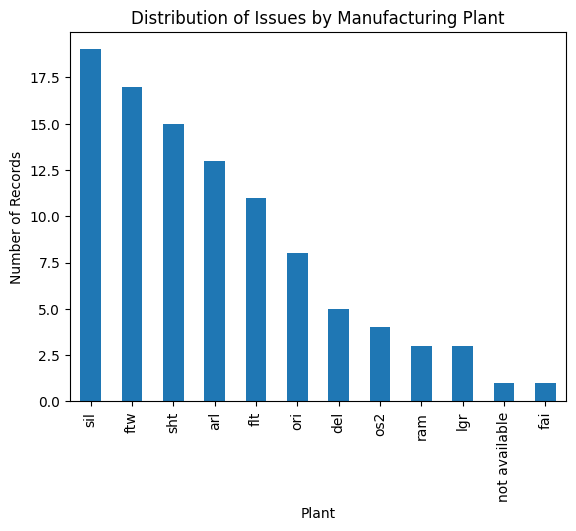

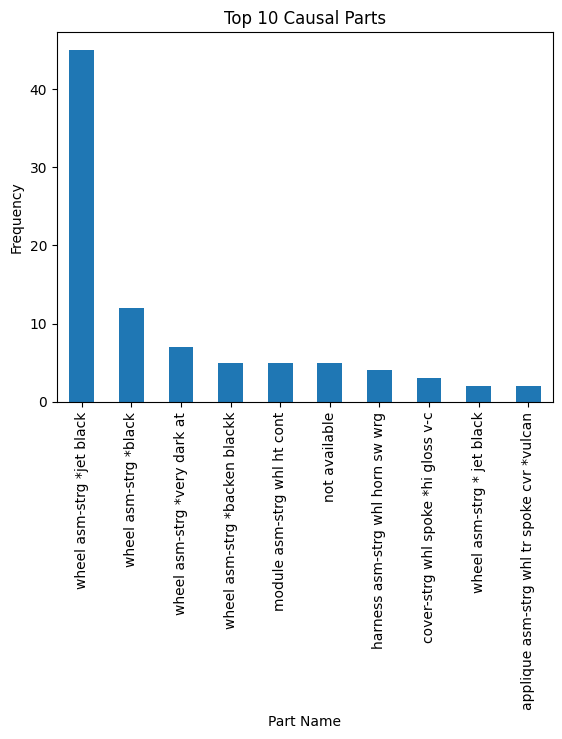

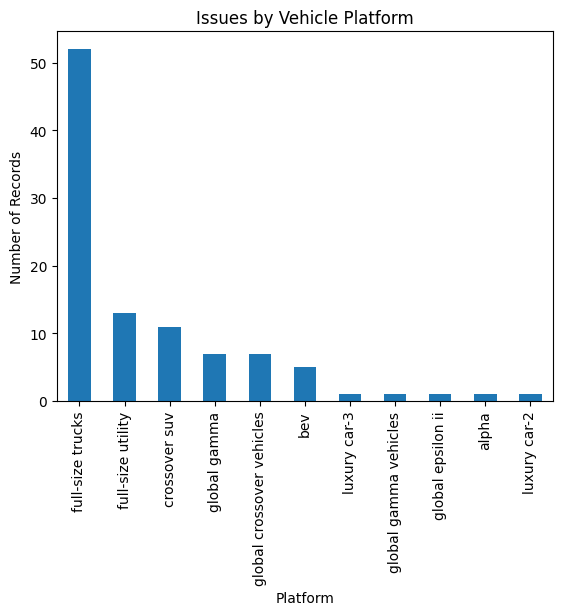

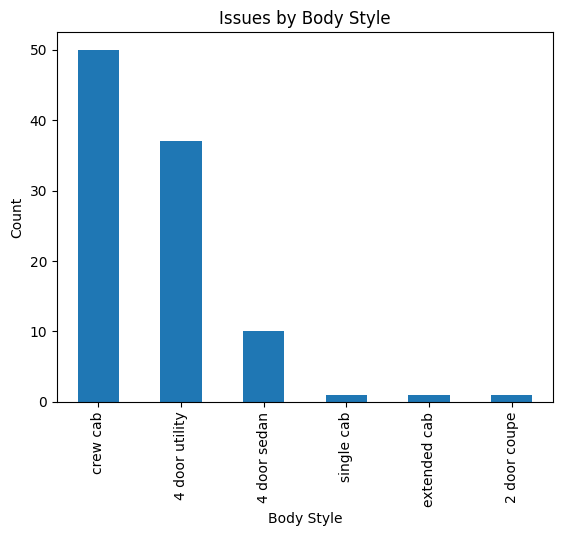

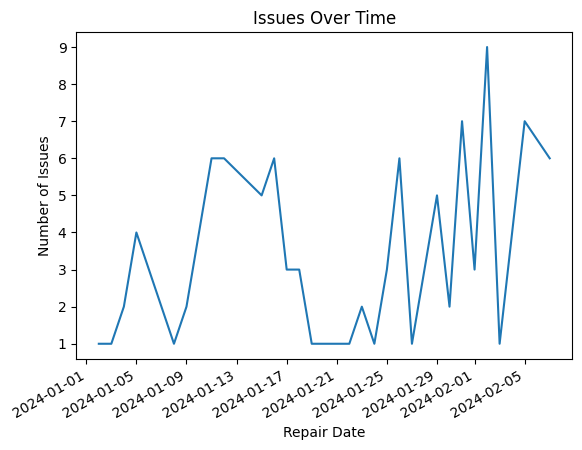

In [53]:
#Plant

plt.figure()
df["PLANT"].value_counts().plot(kind="bar")
plt.title("Distribution of Issues by Manufacturing Plant")
plt.xlabel("Plant")
plt.ylabel("Number of Records")
plt.show()

#Casual Parts
plt.figure()
df["CAUSAL_PART_NM"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Causal Parts")
plt.xlabel("Part Name")
plt.ylabel("Frequency")
plt.show()

#Platform
plt.figure()
df["PLATFORM"].value_counts().plot(kind="bar")
plt.title("Issues by Vehicle Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Records")
plt.show()

#Body Style
plt.figure()
df["BODY_STYLE"].value_counts().plot(kind="bar")
plt.title("Issues by Body Style")
plt.xlabel("Body Style")
plt.ylabel("Count")
plt.show()

#Repair date
plt.figure()
df["REPAIR_DATE"].value_counts().sort_index().plot(kind="line")
plt.title("Issues Over Time")
plt.xlabel("Repair Date")
plt.ylabel("Number of Issues")
plt.show()

In [54]:
#line chatr used for visualizing the trends over time

4. Generating tags/features from free text available :

*   Generate meaningful tags from the free text fields to summarize information,
example - failure conditions and components etc..



In [55]:
#Tag generatiion from free text

In [56]:
# Combining free-text fields
df["combined_text"] = (
    df["CUSTOMER_VERBATIM"].astype(str) + " " +
    df["CORRECTION_VERBATIM"].astype(str)
).str.lower()

Note: Tags were generated using rule-based keyword matching on customer and technician free-text fields, based on commonly occurring, domain-relevant terms that describe failures, components, and repair actions.

In [57]:
# 1. Failure conditions
failure_conditions = {
    "leak": "Leak",
    "broken": "Broken",
    "loose": "Loose",
    "missing": "Missing",
    "fault": "Fault",
    "not working": "Not Working",
    "error": "Error",
    "cracked": "Cracked"
}


In [58]:
# 2. Components
components = {
    "sensor": "Sensor",
    "hose": "Hose",
    "pump": "Pump",
    "valve": "Valve",
    "engine": "Engine",
    "transmission": "Transmission",
    "bracket": "Bracket",
    "coupler": "Coupler",
    "oring": "O-Ring"
}


In [60]:
# 3. Repair
repair_actions = {
    "replace": "Replaced",
    "replaced": "Replaced",
    "install": "Installed",
    "installed": "Installed",
    "repair": "Repaired",
    "repaired": "Repaired",
    "tighten": "Tightened",
    "tightened": "Tightened",
    "reset": "Reset",
    "clean": "Cleaned",
    "cleaned": "Cleaned",
    "test": "Tested"
}

In addition to failure conditions and affected components, repair action tags were generated from technician notes to better summarize how issues were resolved and to enable repair-pattern analysis.

In [72]:
#Now we need to use the function for tag extraction

In [73]:
def extract_tags(text, keyword_map):
    tags = []
    for key, tag in keyword_map.items():
        if key in text:
            tags.append(tag)
    return list(set(tags))

In [74]:
#Lets apply Tagging for three of them

In [76]:
df["Failure_Condition_Tags"] = df["combined_text"].apply(
    lambda x: extract_tags(x, failure_conditions)
)

df["Component_Tags"] = df["combined_text"].apply(
    lambda x: extract_tags(x, components)
)

df["Repair_Action_Tags"] = df["combined_text"].apply(
    lambda x: extract_tags(x, repair_actions)
)

df[
    ["CUSTOMER_VERBATIM", "Failure_Condition_Tags", "Component_Tags", "Repair_Action_Tags"]
].head(10)


,CUSTOMER_VERBATIM,Failure_Condition_Tags,Component_Tags,Repair_Action_Tags
0,steering wheel coming apart,[],[],[Replaced]
1,customer states heated steering wheel inop,[Fault],[],"[Replaced, Tested]"
2,owner reports: the super cruise bar on the ste...,[],[],"[Replaced, Installed]"
3,customer states the lettering and finish on th...,[],[],[Replaced]
4,c/s: customer states the service driver assist...,[],[],[Replaced]
5,horn and steering wheel switches are inoperable,[],[],[Replaced]
6,cust. states drivers assist light comes on das...,[],[],"[Replaced, Tested, Repaired]"
7,special order part [ steering wheel heated ste...,[Not Working],[],[Replaced]
8,customer states steering wheel is making a rub...,[],[],[]
9,customer states that they are getting a messag...,[],[],[Replaced]


In [78]:
df.to_excel("task2_cleaned_tagged_data.xlsx", index=False)


5. Summary and Insights (Food for thought and has bonus marks)

*   Write a summary of the tags generated, including potential insights derived from
the dataset.
*   Provide actionable recommendations for stakeholders based on your analysis.

*   Highlight discrepancies in the dataset (e.g., null values, missing primary keys)
and how did you approach.



#Answer

1.   Summary of Tags:
Tags were generated from free-text fields to capture failure conditions, affected components, and repair actions, helping convert unstructured descriptions into meaningful, structured information.

2.   Actionable Recommendations:
The analysis shows frequent leak and sensor-related issues, suggesting the need for stronger assembly checks, improved sealing practices, and standardized repair procedures


3.   Data Discrepancies:
Missing values and inconsistent text were observed and handled through appropriate imputation and text normalization to ensure reliable analysis.



